In [1]:
using InMemoryDatasets, StatisticalGraphics, DLMReader, Chain

`Bubble` is similar to `Scatter`, however, user can pass a `size` column to `Buble`

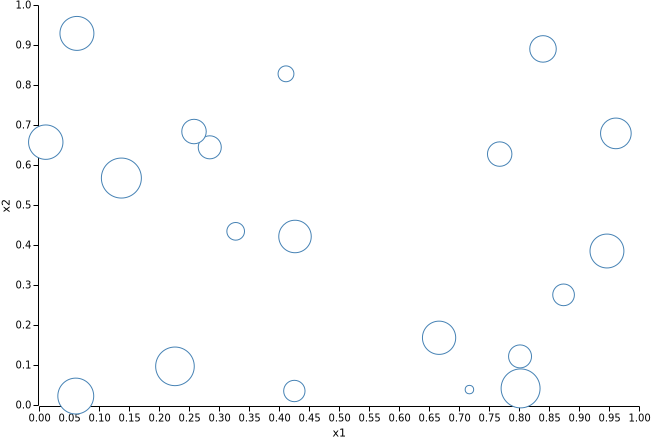

In [2]:
ds = Dataset(rand(20, 3), :auto)

sgplot(ds, Bubble(x=:x1, y=:x2, size=:x3), clip=false)

`Bubble` support most of the keywords available to `Scatter`

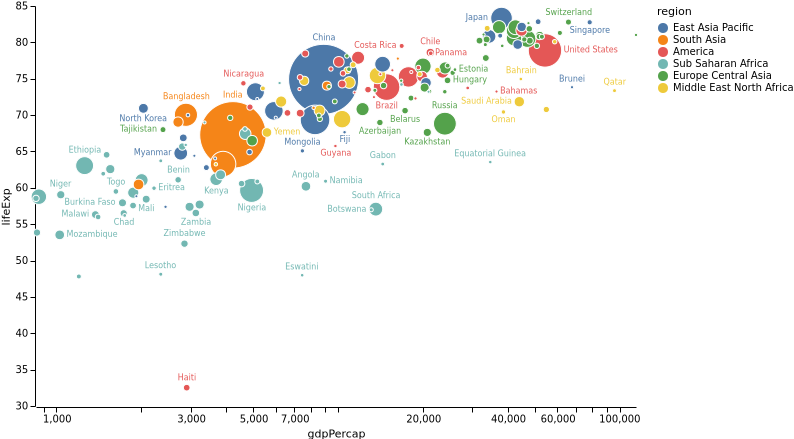

In [3]:
nations = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                                 "..", "docs", "assets", "nations.csv"),
                                 emptycolname=true, quotechar='"')

@chain nations begin
  sort([:population, :continent], rev=[true, false]);
  filter(:year, by = ==(2010));
  sgplot(
    Bubble(x=:gdpPercap,
           y=:lifeExp,
           colorresponse=:region,
           colormodel=:category,
           size=:population,
           outlinecolor=:white,
           labelresponse=:country,
           labelsize=8,
           labelcolor=:colorresponse,
           maxsize=70,
           tooltip=true
          ),
          clip=false,
          xaxis=Axis(type=:log, nice=false),
      )
end

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*